# EDSA Apple Price Challenge - TS3 Regression

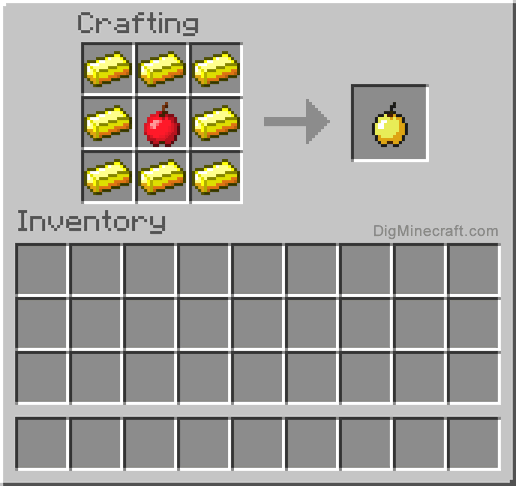

# Introduction

We are going to construct a regression algorithm that will accurately predict the price of the Golden Delicious Apples given the conditions. 

We will embark on a journey to explore the following:


### 1. Collecting/downloading the golden apple data (Data Collection)
   
### 2. Review the dataset for abnormality and make ammendments where necessary (Data cleaning)
a. Null values 

c. Duplicate values        
        
### 3. Investigate the data through descriptive statistics and visualisation tools (EDA)
a. Understand the pattern in the data

b. Determine relationship between the variables

c. Discover outliers in the data        
        
### 3. Build the model that will allow us to accurately predict the price of the Golden Apples (Model building)
a. Select the variables that are relevant in making the price decisions

b. Try different algorithms to find the best model

c. Train our best model 

### 4. Deploy our model, and enter the Kaggle competition!

asdfasdfasdfasdfasdfasdfasdfasdfasdfasdfaef

# Importing Python libraries

We will first import all the libraries needed for our journey

In [2]:
from scipy import stats
import math
import pickle
import numpy as np
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

# Regression
from sklearn.linear_model import LinearRegression

# Model selection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

#Add more as we need

# 1. Data Collection

# Importing the data

We will import our data here

In [23]:
#Importing the test dataset from Git repo

df_test   = pd.read_csv('https://raw.githubusercontent.com/rlatndgb/EDSA-TS3-Regression/main/df-test_set.csv', index_col=0)
df_train = pd.read_csv('https://raw.githubusercontent.com/rlatndgb/EDSA-TS3-Regression/main/df-train_set.csv', index_col=0)

In [4]:
#First 5 rows of the test data
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
Index,,,,,,,,,,,,
1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


### Testing KB

In [5]:
#First 5 rows of the train data
df_train.head()

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,,,,
CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


### Notice that the train data contains many more commodities besides the APPLE GOLDEN DELICIOUS

# 2. Data Cleaning

Let's have a quick overview of our dataset!

In [6]:
#Check the shape of our df_test
df_test.shape

(685, 12)

In [7]:
df_train.shape

(64376, 12)

There are a lot more data in the train dataset compare to the test dataset

In [8]:
#Detailed information of our data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 1 to 685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province        685 non-null    object 
 1   Container       685 non-null    object 
 2   Size_Grade      685 non-null    object 
 3   Weight_Kg       685 non-null    float64
 4   Commodities     685 non-null    object 
 5   Date            685 non-null    object 
 6   Low_Price       685 non-null    float64
 7   High_Price      685 non-null    float64
 8   Sales_Total     685 non-null    float64
 9   Total_Qty_Sold  685 non-null    int64  
 10  Total_Kg_Sold   685 non-null    float64
 11  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 69.6+ KB


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64376 entries, CAPE to CAPE
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Container         64376 non-null  object 
 1   Size_Grade        64376 non-null  object 
 2   Weight_Kg         64376 non-null  float64
 3   Commodities       64376 non-null  object 
 4   Date              64376 non-null  object 
 5   Low_Price         64376 non-null  float64
 6   High_Price        64376 non-null  float64
 7   Sales_Total       64376 non-null  float64
 8   Total_Qty_Sold    64376 non-null  int64  
 9   Total_Kg_Sold     64376 non-null  float64
 10  Stock_On_Hand     64376 non-null  int64  
 11  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 6.4+ MB


The info command allowed us to confirm that there are **12** variables, some **categorical** and some **numerical**.
We do not have any null values, however we will reassure using another command

In [24]:
#Here we are creating a function that searches for any mising values

def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [25]:
#Missing values in the test data

missing_values_table(df_test)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [14]:
#Missing values in the train data

missing_values_table(df_train)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


There are **no** null values in our data set. Lovely!

# 3. Exploratory Data Analysis

Let's have a look at some descriptive statistics of our data.

This includes, the **count, mean, standard deviation, minimum, Q1, median, Q3 and maximum value**.

In [13]:
#Descriptional Stats on the test data

round(df_test.describe(), 2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.00,685.00,685.00,685.00,685.00,685.00,685.00
mean,34.14,164.20,195.59,18788.11,174.88,2725.40,439.25
std,87.58,355.17,389.11,33951.59,299.35,5059.12,715.99
min,3.00,10.00,10.00,10.00,1.00,6.30,0.00
25%,9.00,50.00,64.00,1300.00,13.00,204.00,20.00
50%,12.00,80.00,112.00,5520.00,62.00,860.10,153.00
75%,18.30,128.00,160.00,21176.00,200.00,3033.00,516.00
max,400.00,2400.00,2400.00,308010.00,2774.00,47200.00,6827.00


In [14]:
#Descriptive stats on the train data

round(df_train.describe(), 2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.00,64376.00,64376.00,64376.00,64376.00,64376.00,64376.00,64376.00
mean,12.78,75.65,89.61,19395.01,446.10,3336.64,477.65,NaN
std,35.94,159.51,172.22,44421.92,1184.17,7682.30,1453.89,NaN
min,0.12,1.00,1.00,-57700.00,-595.00,-5040.00,-512.00,-inf
25%,7.00,30.00,35.00,1154.00,20.00,175.00,0.00,4.02
50%,10.00,46.00,55.00,5400.00,107.00,940.00,76.00,6.00
75%,11.00,80.00,100.00,18772.00,390.00,3250.00,381.00,8.67
max,500.00,4400.00,4400.00,1134701.00,39453.00,192230.00,93193.00,inf


The train data contains some nagative values, and there are also inf values. Let's see what those are

In [30]:
#Data in train data where sales total is a negative value
neg_cols = ['Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']

df_train[df_train['Sales_Total'] < 0].head()

#Fill the column names, or loop through the columns list to see which rows have negative valus

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,,,,
CAPE,BN150,2U,15.0,ORANGE MIDNIGHTS,2020-09-01,55.0,55.0,-2805.0,-51,-765.0,51,3.67
EASTERN FREESTATE,PP100,4M,10.0,POTATO (WASHED) MONDIAL,2020-05-04,5.0,5.0,-1080.0,0,0.0,0,-inf
CAPE,EC120,1L,12.0,APPLE BRAEBURN,2020-07-20,64.0,80.0,-944.0,1,12.0,0,-78.67
KWAZULU NATAL,PP100,3M,10.0,POTATO VALOR (WASHED),2019-12-23,25.0,32.0,-9161.0,-297,-2970.0,772,3.08
CAPE,AZ035,1S,3.5,ORANGE NAVELS,2020-07-15,10.0,12.0,-6600.0,-200,-700.0,696,9.43


In [33]:
# Lets look at inf values

df_train[(df_train['avg_price_per_kg']) > 1000]

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,,,,
WESTERN CAPE - CERES,AF070,2M,7.00,ONIONS BROWN,2020-05-09,54.0,54.0,10780.0,0,0.00,0,inf
W.CAPE-BERGRIVER ETC,M4183,1S,18.30,APPLE GALA,2020-06-13,100.0,100.0,1820.0,0,0.00,0,inf
NATAL,A1001,1M,0.12,GARLIC LOCAL,2020-07-06,50.0,200.0,400.0,3,0.36,49,1111.11
NATAL,A1001,1M,0.12,GARLIC LOCAL,2020-06-27,150.0,150.0,150.0,1,0.12,48,1250.00


It seems that the erratic values (negative values and infinity values) are not a concern of the APPLE GOLDEN DELICIOUS.

The simplest solution would be to subset our data so that we only look at the APPLE GOLDEN DELICIOUS.

A caveat in this case may be that the price of other commodities may affect the price of APPLE GOLDEN DEWLICIOUS, therefore we may not simply exclude the rest of the data

In [35]:
# But let's subset it anyways. APLE GOLDEN DELICIOUS = AGD

df_AGD = df_train[df_train['Commodities'] == 'APPLE GOLDEN DELICIOUS']
df_AGD.head(10).shape

(10, 12)

In [21]:
round(df_AGD.describe(), 2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.00,1952.00,1952.00,1952.00,1952.00,1952.00,1952.00,1952.00
mean,40.46,174.31,215.65,20053.53,174.51,2960.18,408.39,6.78
std,99.66,373.55,433.55,39005.07,308.81,6097.42,724.45,2.25
min,3.00,2.00,5.00,5.00,1.00,3.00,0.00,0.25
25%,9.00,50.00,60.00,1325.00,12.00,219.60,9.00,5.46
50%,12.00,80.00,108.00,5495.00,64.00,853.50,126.50,6.67
75%,18.30,127.25,160.00,21082.50,200.00,3093.52,468.00,8.28
max,400.00,2300.00,3300.00,369464.00,4237.00,74000.00,6400.00,21.24


D:\EXPLORE\Software\Software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

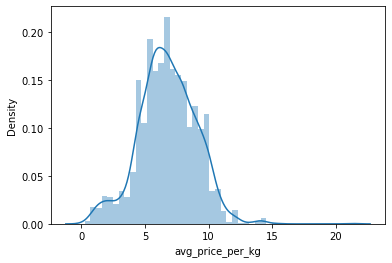

In [37]:
sns.distplot(df_AGD['avg_price_per_kg'], kde=True)

Our data seems fairly normally distributed, but we will confirm it

Kurtosis is the measure of outliers: **High kurtosis (>3)** and **low kurtosis (3>)** indicates large and lack of outliers, respectively.

Skewness indicates the symmetry of the data

In [23]:
df_AGD.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

The kurtosis shows that there are likely be many outliers in our dataset. We will bear this in our mind when we visualise the data. 

In [37]:
df_AGD.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

All our data have skewnesss higher thatn 1. Which tells us that it is positively skewed.

## One-hot Encoding 

This is where we assign our categorical data a numerical equivalent for the purpose of model building

In [24]:
dummy_df_AGD = pd.get_dummies(df_AGD)
dummy_df_AGD.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Container_AC030,Container_DT063,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
Province,,,,,,,,,,,,,,,,,,,,,
CAPE,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,1,0,0,0,0,0,0,0,0
CAPE,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,...,0,0,0,0,0,0,0,0,0,0
W.CAPE-BERGRIVER ETC,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
CAPE,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,...,0,0,0,0,0,0,0,0,0,0
EASTERN CAPE,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
dummy_df_AGD.shape

(1952, 177)

Now we have 177 columns instead of 12. This is largely due to the fact that our "Date" variable was converted into numerical variable (1,0)

We will deal with this later

## Correlation threshold selection

Let's determine how our predictors (x) are correlated to our response (y; 'avg_price_per_kg')


In [26]:
column_titles = [col for col in dummy_df_AGD.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df_AGD=dummy_df_AGD.reindex(columns=column_titles)

In [27]:
corrs = pd.DataFrame(dummy_df_AGD.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Size_Grade_1L,0.280966
Size_Grade_1X,0.251451
Container_EC120,0.188162
...,...
Container_JE090,-0.322235
Weight_Kg,-0.337886
Size_Grade_2S,-0.352996
Container_IA400,-0.355565


We need to evaluate the autocorrelation among the predictor variables. 

In [28]:
r, c = np.where(np.abs(corrs) > 0.9) # High correlation
off_diagonal = np.where(r != c)
corrs.iloc[r[off_diagonal], c[off_diagonal]]

""


Let's determine if there are any linear relationship betweem using Pearson's correlation. 

For now, we are assumung that our data is normal (we will log transform it later)

In [29]:
dummy_df_AGD.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Container_AC030,Container_DT063,Container_EC120,...,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.047765,-0.019039,-0.155910,...,-0.000198,0.033551,0.030081,0.012951,-0.002203,0.011755,0.047837,0.014122,-0.020392,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.055111,-0.021828,-0.136387,...,0.008578,0.034609,0.009833,0.008149,-0.002319,0.010579,0.052795,0.017314,-0.016353,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.059450,-0.024103,-0.131819,...,0.001218,0.024377,0.017574,0.017332,0.002738,0.016959,0.055844,0.017007,-0.018776,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,-0.056335,-0.028371,0.072059,...,-0.021465,-0.011891,-0.008234,-0.015970,-0.016685,0.004517,0.007223,-0.025153,-0.022198,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,-0.003183,-0.029978,0.177089,...,-0.021791,-0.010078,-0.004524,-0.013067,-0.017115,0.003774,-0.011998,-0.018147,-0.017393,0.087536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Date_2020-09-23,0.011755,0.010579,0.016959,0.004517,0.003774,0.007462,0.007288,-0.012594,0.088758,0.007933,...,-0.008427,-0.007464,-0.007797,-0.006360,-0.008725,1.000000,-0.008427,-0.009829,-0.007464,-0.006914
Date_2020-09-28,0.047837,0.052795,0.055844,0.007223,-0.011998,0.016391,0.024036,-0.010797,-0.004719,-0.017514,...,-0.007224,-0.006398,-0.006685,-0.005452,-0.007479,-0.008427,1.000000,-0.008427,-0.006398,-0.011840
Date_2020-10-01,0.014122,0.017314,0.017007,-0.025153,-0.018147,-0.023714,-0.026142,-0.012594,-0.005505,-0.016884,...,-0.008427,-0.007464,-0.007797,-0.006360,-0.008725,-0.009829,-0.008427,1.000000,-0.007464,0.029294
Date_2020-10-03,-0.020392,-0.016353,-0.018776,-0.022198,-0.017393,-0.022634,-0.010955,-0.009563,-0.004180,0.024012,...,-0.006398,-0.005667,-0.005921,-0.004829,-0.006625,-0.007464,-0.006398,-0.007464,1.000000,0.024877


Let's make a visualisation for easier interpretation.

In [30]:
#heatmap = sns.heatmap(dummy_df_AGD.corr(), vmin=-1, vmax=1, annot=True)

#Runnig this code is not a very good idea as there are way too many variables

### Add some more visualisations!

At this point, we should think which variables are redundant.

For instance, do we want to keep total qty sold AND totla kg sold? Are they not the same in some sense?

Also, we should think about which variables / features are relavant in making our model. (Feature selection)

# 4. Model building

How do we build a multivariate model? I don't know yet

The formula for a simple regression is:

$$\hat{y}_i = a + bx_i$$   

# Training

## Preprocessing

In [31]:
missing_values_table(dummy_df_AGD)



Your selected dataframe has 177 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Making Predictions

In [6]:
#Function to fit data, make prediction and evaluate model

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred, y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)

def fit_and_eval(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)
    
    #Training
    model.fit(X_train, y_train)

    #Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)

    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)

    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}

    return df


In [7]:
model = LinearRegression(n_jobs = -1)
y = df_AGD['avg_price_per_kg']
y.shape

(1952,)

In [ ]:
X = df_AGD

# Deploying our model!

# Logical Flow of builing a regression model

1. Data collection and cleaning.

    a. Collect data, look for empty or duplicate values

    b. Replace empty cells with either mean/median 

2. EDA

    a. Look at summary statistics for overview of our data

    b. Find relationship between the predictor-response

    c. Find autocorrelation among the predictors

    d. (?) Dummy encoding

3. Model builing

    a. Train/test split
    
    b. Fitting simple linear Regression

    c. Fitting multivariate linear Regression

    d. Feature selection

    e. Save and restore model

    e. Regularisation